# Tutorial 8

This code is a translation of chapter five of ISL from https://github.com/hardikkamboj

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# for viewing graphs
from IPython.display import HTML

In [2]:
carseats = pd.read_csv('https://www.dropbox.com/s/77ge3t20isufivo/Carseats.csv?dl=1')
data = carseats.copy() # i am used to treat data as "data"
print(carseats.shape)
carseats.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Before going furthur, according to me its a good advice to get familier with the data. The current data we have is of an organization who sells car seats (this is my take on the dataset), each row represents a region. Therefore for each region, the columns are - 
- Sales: unit sales in thousands
- CompPrice: price charged by competitor at each location
- Income: community income level in 1000s of dollars
- Advertising: local ad budget at each location in 1000s of dollars
- Population: regional pop in thousands
- Price: price for car seats at each site
- ShelveLoc: Bad, Good or Medium indicates quality of shelving location
- Age: age level of the population
- Education: ed level at location
- Urban: Yes/No
- US: Yes/No

Looking at the above data we can get some idea what job we have in our hands, so the company wants to set up a busniess in some new region, we have the information of that region and want to predict what the sales would be..To make the model we will use this data as training data
source - http://rstudio-pubs-static.s3.amazonaws.com/244643_520e0851a0f74d9fb588c8aaad481e21.html#:~:text=The%20Carseats%20data%20set%20tracks,different%20store)%20and%2011%20variables%3A&text=Price%3A%20price%20for%20car%20seats,indicates%20quality%20of%20shelving%20location

### Encoding the categorical variables

In [3]:
print(data['ShelveLoc'].unique())
print(data['Urban'].unique())
print(data['US'].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [4]:
# as the labels are ordinal, we would only be using label encoder, and since the values are small in number, we will map them
yes_no_dict = {'Yes':1,'No':0}
data['Urban'] = data['Urban'].map(yes_no_dict)
data['US'] = data['US'].map(yes_no_dict)
data['ShelveLoc'] = data['ShelveLoc'].map({'Bad':0,'Good':1,'Medium':3})

In [5]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [6]:
# adding a binary target variable
data['Sales_binary'] = np.where(data['Sales']<=9,0,1)

In [7]:
# splitting X and y
X = data.drop(['Sales','Sales_binary'],axis = 1)
y = data['Sales_binary']

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
clf = DecisionTreeClassifier(max_depth=6) 
# earlier i fitted it without giving the max depth paramter, and the fitted tree was having depth = 10, which is a high number
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Plotting tree - https://mljar.com/blog/visualize-decision-tree/

In [9]:
#plotting tree
import graphviz 
# I faced a problem that i was not able to import it even after installing, to solve this issue 
# first run "conda install graphviz" and then "conda install python-graphviz"

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data) 
display(HTML(graph._repr_svg_()))

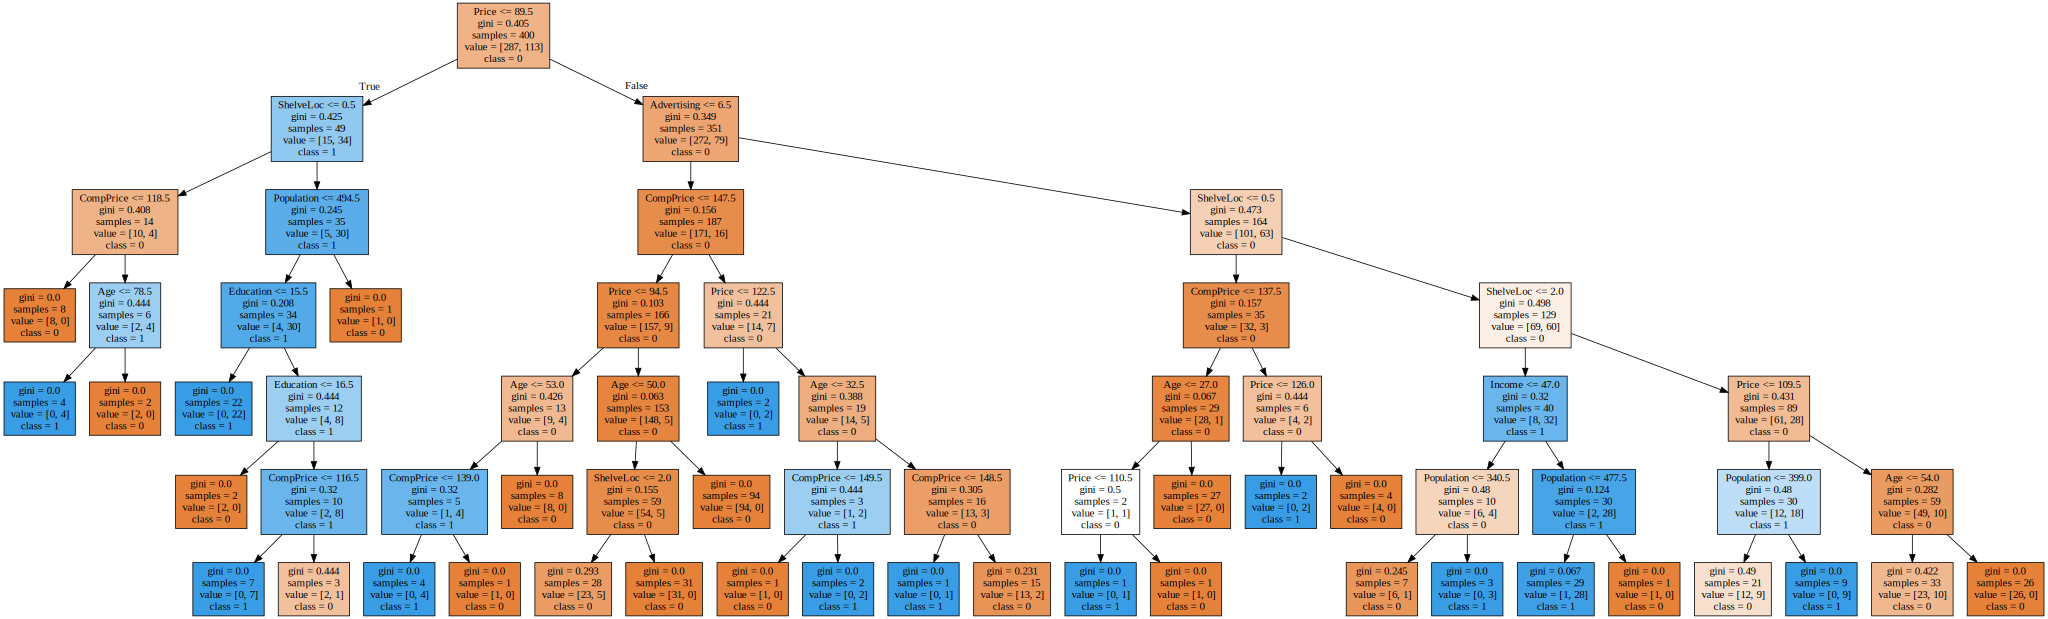

In [10]:
# to make the above graph more readable, we can use -
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

What we can get from the above tree is that the most important crietrion is the price feature. if the price is less than or equal to 89.5, we look at shelving condition, else we look at advertising cost..

## Finding the test error

In [17]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Sales','Sales_binary'],axis = 1),data['Sales_binary'],test_size = 0.5,random_state = 1)

In [18]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)
print('Training accuracy ',clf.score(X_train,y_train))
print('Test Accuracy ',clf.score(X_test,y_test))

Training accuracy  0.94
Test Accuracy  0.715


In [20]:
cm = confusion_matrix(y_test,clf.predict(X_test))
cm

array([[125,  21],
       [ 36,  18]], dtype=int64)

# cross validating for optimal size (just as we are doing pruing in the book)

In [32]:
scores_dict = {}
for max_depth in np.arange(2,15):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    scores_dict[max_depth] = np.mean(cross_val_score(clf,X,y,cv = 10))

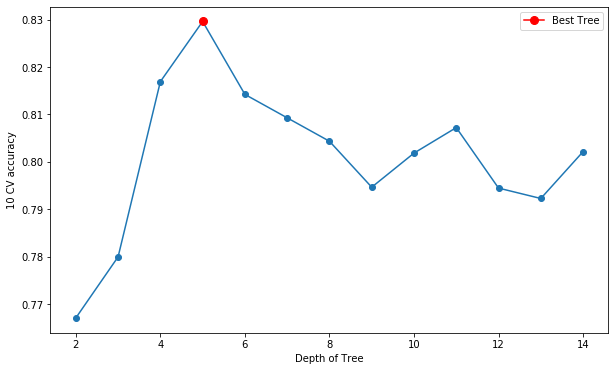

In [38]:
plt.figure(figsize = (10,6))
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker ='o')
plt.plot(max(scores_dict, key=scores_dict.get),max(list(scores_dict.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('10 CV accuracy')
plt.legend()

# Examples of Tree Models using Sklearn

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score,train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'https://www.dropbox.com/s/pyyjoixg3r2z41t/Heart.csv?dl=1',index_col = 0)
print(data.shape)
data.head()

(303, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
data.dropna(inplace = True)

In [5]:
data['AHD'].value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

In [6]:
# encoding the categorical variables
data['ChestPain'].value_counts()

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

In [7]:
data['Thal'].value_counts()

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

The below code taken from - https://github.com/hardikkamboj/Code/blob/master/my_encoder/my_encoder.py

In [8]:
# for encoding

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin


class Myencoder(BaseEstimator, TransformerMixin):
   
    def __init__(self,drop = 'first',sparse=False):
        self.encoder = OneHotEncoder(drop = drop,sparse = sparse)
        self.drop = True if drop == 'first' else False
        self.features_to_encode = []
        self.columns = []
    
    def fit(self,X_train,features_to_encode):
        
        data = X_train.copy()
        self.features_to_encode = features_to_encode
        data_to_encode = data[self.features_to_encode]
        self.columns = pd.get_dummies(data_to_encode,drop_first = self.drop).columns
        self.encoder.fit(data_to_encode)
        return self.encoder
    
    def transform(self,X_test):
        
        data = X_test.copy()
        data.reset_index(drop = True,inplace =True)
        data_to_encode = data[self.features_to_encode]
        data_left = data.drop(self.features_to_encode,axis = 1)
        
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode),columns = self.columns)
        
        return pd.concat([data_left,data_encoded],axis = 1)

In [9]:
my_enc = Myencoder(drop = None)
my_enc.fit(data,['ChestPain','Thal'])

OneHotEncoder(sparse=False)

In [10]:
data = my_enc.transform(data)

In [11]:
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37,1,130,250,0,0,187,0,3.5,3,0.0,No,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
data['AHD'] = data['AHD'].map({'Yes':1,'No':0})

In [13]:
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# splitting the X and y data
X = data.drop('AHD',axis = 1)
y = data['AHD']

# Decision Tree Classifier

In [15]:
score_dict = {}
for tree_size in np.arange(1,21):
    cls = DecisionTreeClassifier(max_depth=tree_size)
    score_dict[tree_size] = np.mean(cross_val_score(cls,X,y,cv=10))

Text(0, 0.5, '10 CV Score')

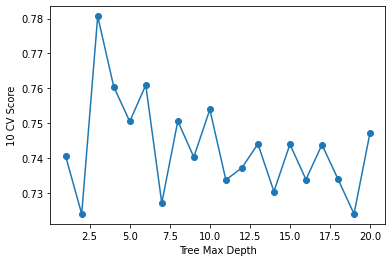

In [16]:
plt.plot(list(score_dict.keys()),list(score_dict.values()),marker = 'o')
plt.xlabel('Tree Max Depth')
plt.ylabel('10 CV Score')

In [17]:
# the best performane is when max tree deoth is 10
cls = DecisionTreeClassifier(max_depth=10)
cls.fit(X,y)

DecisionTreeClassifier(max_depth=10)

In [18]:
print(np.mean(cross_val_score(cls,X,y,cv=5)))

0.7370056497175141


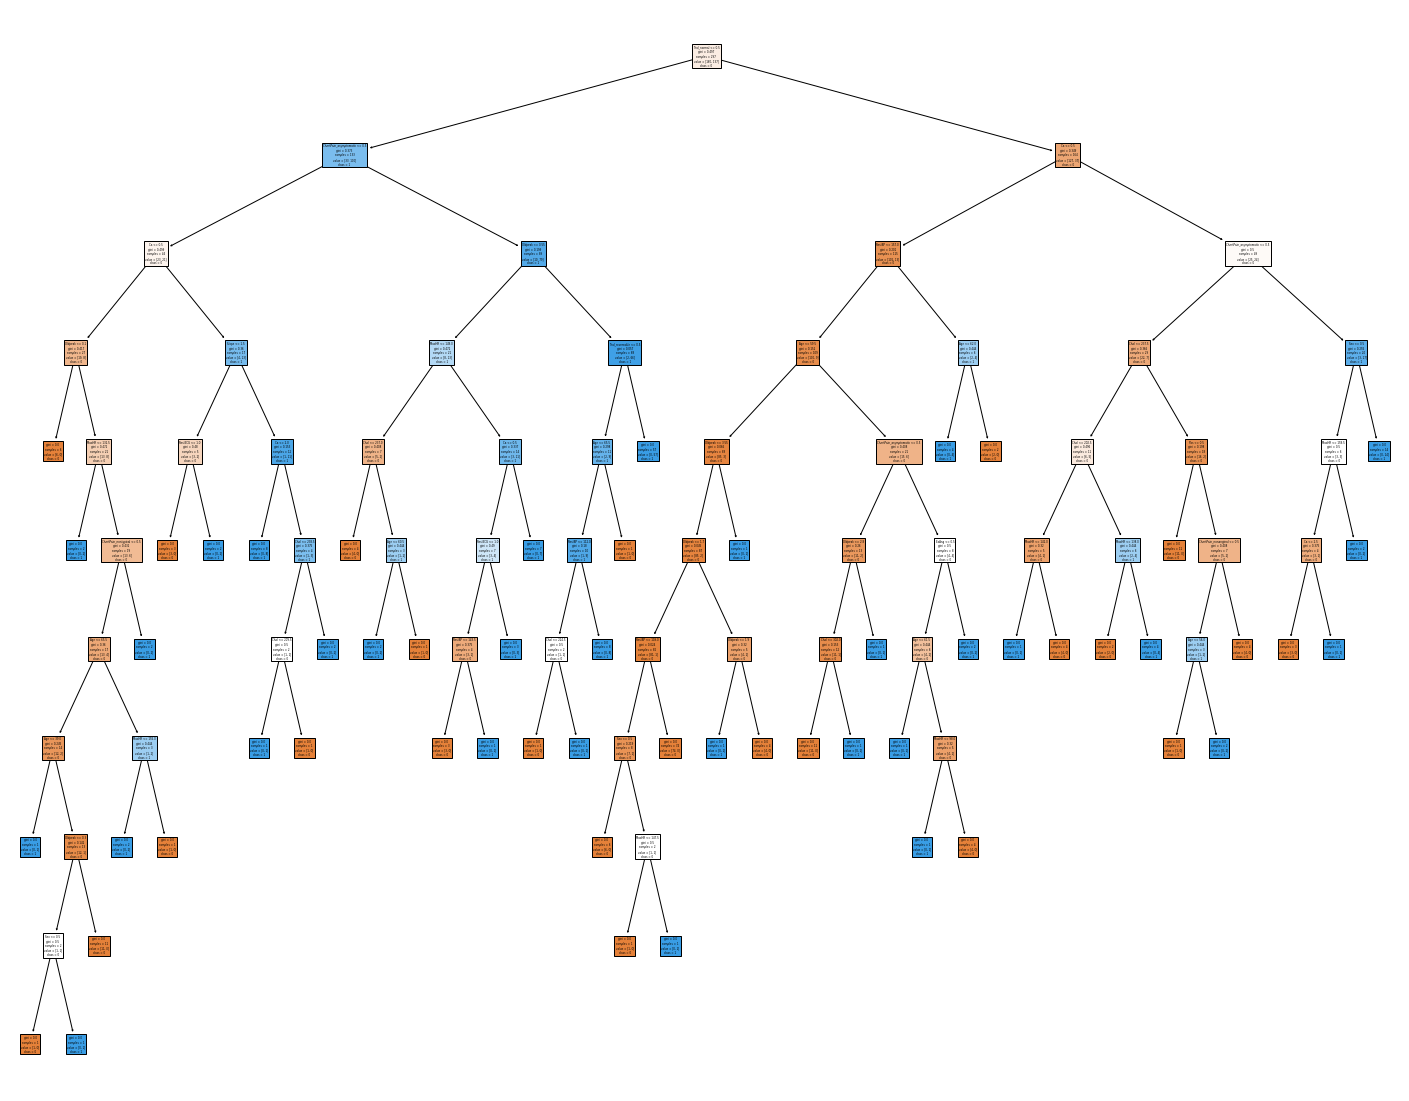

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True)

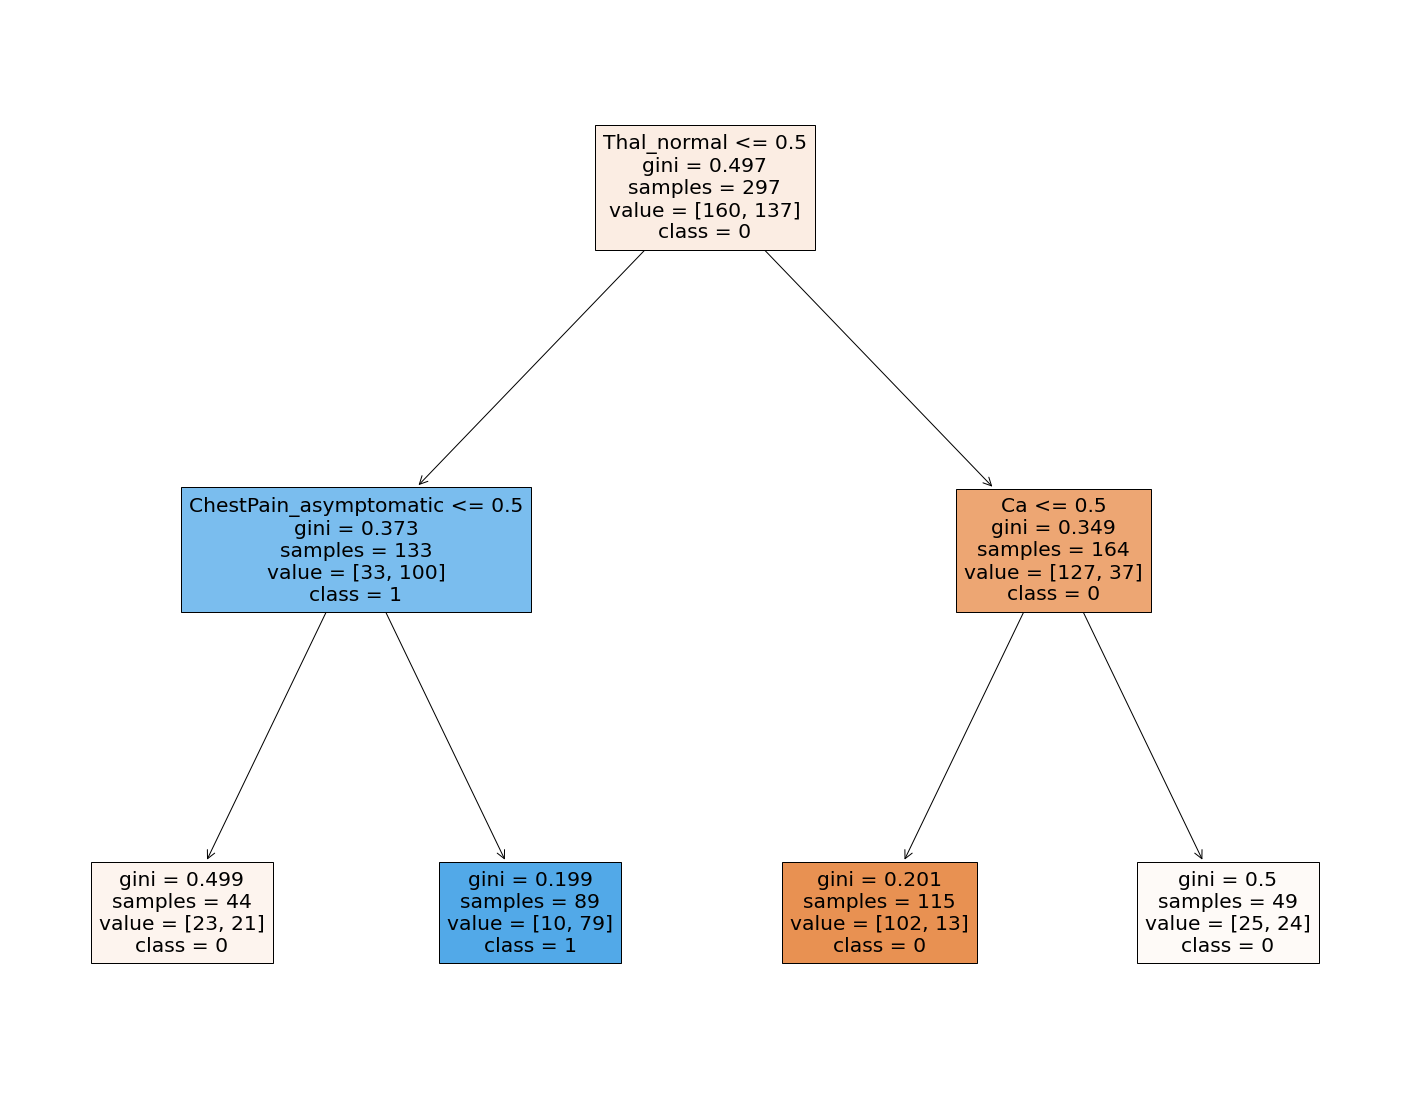

In [20]:
# the best performane is when max tree deoth is 10
cls = DecisionTreeClassifier(max_depth=2)
cls.fit(X,y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True)

# Bagging classifier

In [21]:
from tqdm import tqdm
oob_dict = {}
for tree_size in tqdm(np.arange(10,1000,10)):    
    base_clf = DecisionTreeClassifier()
    bagging_model = BaggingClassifier(base_estimator=base_clf,
                                     n_estimators=1000,oob_score=True)

    bagging_model.fit(X,y)
    oob_dict[tree_size] = bagging_model.oob_score_

 79%|███████▉  | 78/99 [03:38<00:56,  2.68s/it]

Text(0, 0.5, 'OOB Score')

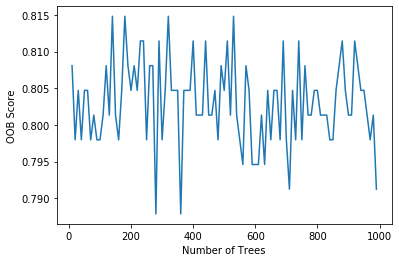

In [ ]:
plt.plot(list(oob_dict.keys()),list(oob_dict.values()))
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')

In [ ]:
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)


In [ ]:
feature_importances

array([0.08481101, 0.0259113 , 0.06676586, 0.07487228, 0.00472276,
       0.01126878, 0.0907505 , 0.02294677, 0.09656291, 0.0278734 ,
       0.13491926, 0.13965269, 0.01054911, 0.00492064, 0.00927962,
       0.00265751, 0.15642445, 0.03511115])

## Feature Importance

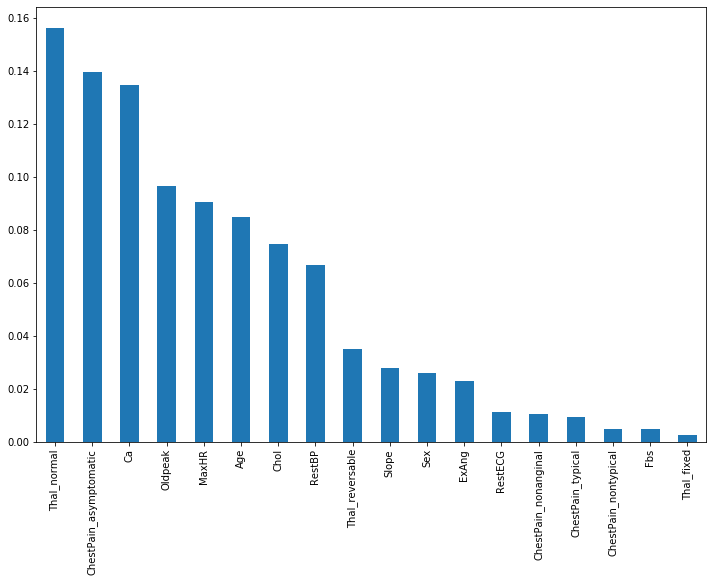

In [ ]:
pd.Series(feature_importances,index = X.columns).sort_values(ascending=False).plot.bar(figsize = (12,8))

# Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from tqdm import tqdm
oob_dict_rf = {}
for tree_size in tqdm(np.arange(10,1000,10)):    
    rf = RandomForestClassifier(n_estimators=tree_size,oob_score=True)
    rf.fit(X,y)
    oob_dict_rf[tree_size] = rf.oob_score_

  0%|                                                                                           | 0/99 [00:00<?, ?it/s]C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [03:03<00:00,  3.43s/it]


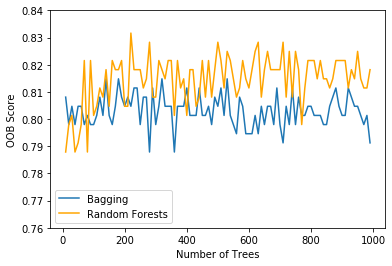

In [ ]:
plt.plot(list(oob_dict.keys()),list(oob_dict.values()),label = 'Bagging')
plt.plot(list(oob_dict_rf.keys()),list(oob_dict_rf.values()),label = 'Random Forests',color = 'orange')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.ylim(0.76,0.84)
plt.legend()

## Feature Importance

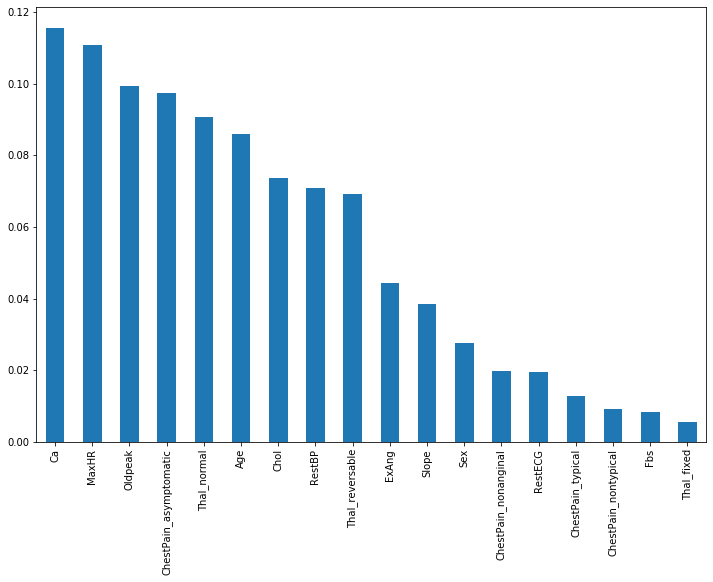

In [ ]:
pd.Series(rf.feature_importances_,index = X.columns).sort_values(ascending=False).plot.bar(figsize = (12,8))

# Boosting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
#depth = 1
from tqdm import tqdm
scores_dict_depth_1 = {}
for tree_size in tqdm(np.arange(10,1000,10)): 
    base_clf = DecisionTreeClassifier(max_depth=1)
    boost = AdaBoostClassifier(base_clf,n_estimators=tree_size)
    boost.fit(X_train,y_train)
    scores_dict_depth_1[tree_size] = 1 - boost.score(X_test,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:59<00:00,  1.16s/it]


In [ ]:
#depth = 2
from tqdm import tqdm
scores_dict_depth_2 = {}
for tree_size in tqdm(np.arange(10,1000,10)): 
    base_clf = DecisionTreeClassifier(max_depth=2)
    boost = AdaBoostClassifier(base_clf,n_estimators=tree_size)
    boost.fit(X_train,y_train)
    scores_dict_depth_2[tree_size] = 1 - boost.score(X_test,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [01:04<00:00,  1.25s/it]


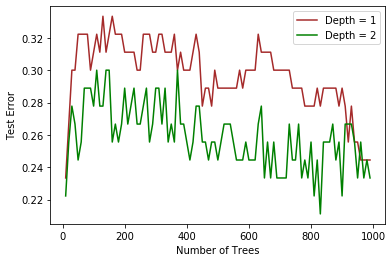

In [ ]:
plt.plot(list(scores_dict_depth_1.keys()),list(scores_dict_depth_1.values()),label = 'Depth = 1',color = 'brown')
plt.plot(list(scores_dict_depth_2.keys()),list(scores_dict_depth_2.values()),label = 'Depth = 2',color = 'green')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.legend()

## GridSearchCV

In [ ]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

predictor = [
    "PassengerId",
    "Age", 
    "Fare", 
    "SibSp",
    "Parch",
    "male", 
    "female", 
    "pclass_1", 
    "pclass_2", 
    "pclass_3",
    "FamilySize",
    "CabinDeck_A",
    "CabinDeck_B",
    "CabinDeck_C",
    "CabinDeck_D",
    "CabinDeck_E",
    "CabinDeck_F",
    "CabinDeck_G",
    "CabinDeck_NaN",
    "embarked_C",
    "embarked_S",
    "embarked_Q"
    ]
    
train = pd.read_csv("https://www.dropbox.com/s/hnrqqx45uy6m4l7/train.csv?dl=1", dtype={"Age": np.float64}, )
test = pd.read_csv("https://www.dropbox.com/s/ok6n3lluoppd1sx/test.csv?dl=1", dtype={"Age": np.float64}, )

def correct_data(titanic_data):
    #titanic_data.Sex = titanic_data.Sex.replace(['male', 'female'], [0, 1])
    titanic_data.Embarked = titanic_data.Embarked.fillna("S")
    #titanic_data.Embarked = titanic_data.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
    titanic_data.Age = titanic_data.Age.fillna(titanic_data.Age.median())
    
    # Trying to add FamilySize
    titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
    
    # add Male & Female one-hot-encoding
    sex_dummy = pd.get_dummies(titanic_data.Sex)
    titanic_data['male']=sex_dummy.male
    titanic_data['female']=sex_dummy.female
    
    # add Embarked one-hot-encoding
    embarked_dummy = pd.get_dummies(titanic_data.Embarked)
    titanic_data['embarked_C'] = embarked_dummy.C
    titanic_data['embarked_S'] = embarked_dummy.S
    titanic_data['embarked_Q'] = embarked_dummy.Q
    
    # add Pclass one-hot-encoding
    pclass_dummy = pd.get_dummies(titanic_data.Pclass)
    titanic_data['pclass_1'] = pclass_dummy[1]
    titanic_data['pclass_2'] = pclass_dummy[2]
    titanic_data['pclass_3'] = pclass_dummy[3]
    
    # Cabin
    titanic_data.Cabin = titanic_data.Cabin.fillna("N")
    titanic_data['CabinDeck'] = titanic_data.Cabin.str.slice(0,1)
    cabindeck_dummy = pd.get_dummies(titanic_data.CabinDeck)

    titanic_data['CabinDeck_A'] = cabindeck_dummy.A
    titanic_data['CabinDeck_B'] = cabindeck_dummy.B
    titanic_data['CabinDeck_C'] = cabindeck_dummy.C
    titanic_data['CabinDeck_D'] = cabindeck_dummy.D
    titanic_data['CabinDeck_E'] = cabindeck_dummy.E
    titanic_data['CabinDeck_F'] = cabindeck_dummy.F
    titanic_data['CabinDeck_G'] = cabindeck_dummy.G
    titanic_data['CabinDeck_NaN'] = cabindeck_dummy.N

    titanic_data.Fare = titanic_data.Fare.fillna(titanic_data.Fare.median())
    
    return titanic_data

correct_train = correct_data(train)
print(correct_train.info())

trainX = correct_train[predictor].values
trainY = correct_train.Survived.values


parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

clf = RandomForestClassifier(n_estimators=320)
clf = clf.fit(trainX, trainY)
fti = clf.feature_importances_
for i, feat in enumerate(predictor):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

model = SelectFromModel(clf, prefit=True)
train_new = model.transform(trainX)
#print (train_new.shape)

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(train_new, trainY)

print(clf.score(train_new, trainY))
print(clf.best_params_)
print(zip(correct_train[predictor].columns, fti))

correct_test = correct_data(test)
testX = correct_test[predictor].values

test_new = model.transform(testX)
#print (test_new.shape)

result = clf.predict(test_new)

test["Survived"] = result
result = test[["PassengerId", "Survived"]]

result.to_csv('titanic_RandomForestClassifier_FamilySize.csv', index=False)